In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [2]:
IMG_SHAPE = (150, 150)

saved_model = tf.keras.models.load_model('../SavedModel/')

dataset_dir = pathlib.Path('../dataset')

dataset_test_dir = list(dataset_dir.glob('test/*'))

class_names = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']

## Prediction On New Data

In [3]:
for i in range(9):
    path_to_file = str(dataset_test_dir[i])
    img = tf.keras.utils.load_img(path_to_file, target_size=IMG_SHAPE)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = saved_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to mountain with a 88.07 percent confidence.
This image most likely belongs to sea with a 100.00 percent confidence.
This image most likely belongs to mountain with a 88.80 percent confidence.
This image most likely belongs to forest with a 99.85 percent confidence.
This image most likely belongs to mountain with a 98.39 percent confidence.
This image most likely belongs to glacier with a 100.00 percent confidence.
This image most likely belongs to building with a 100.00 percent confidence.
This image most likely belongs to forest with a 99.78 percent confidence.
This image most likely belongs to building with a 55.17 percent confidence.


In [4]:
def make_predictions(index):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        path_to_file = str(dataset_test_dir[i + index])
        img = tf.keras.utils.load_img(path_to_file, target_size=(150, 150))
        img_array = tf.keras.utils.img_to_array(img)
        plt.imshow(img_array.astype("uint8"))
        img_array = tf.expand_dims(img_array, 0)
        predictions = saved_model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        plt.title(class_names[np.argmax(score)])
        plt.axis("off")

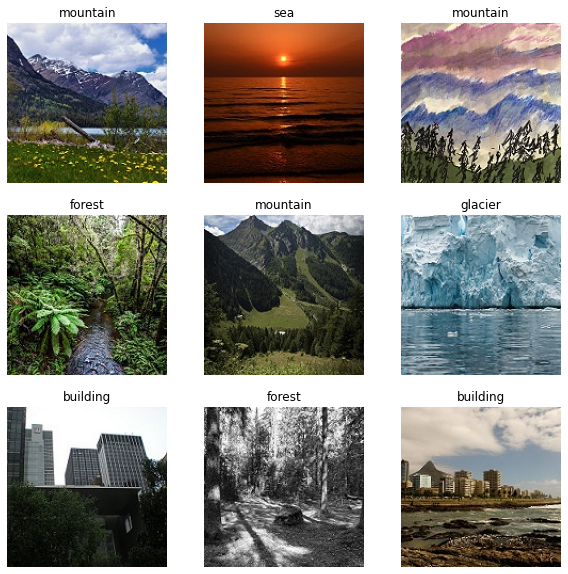

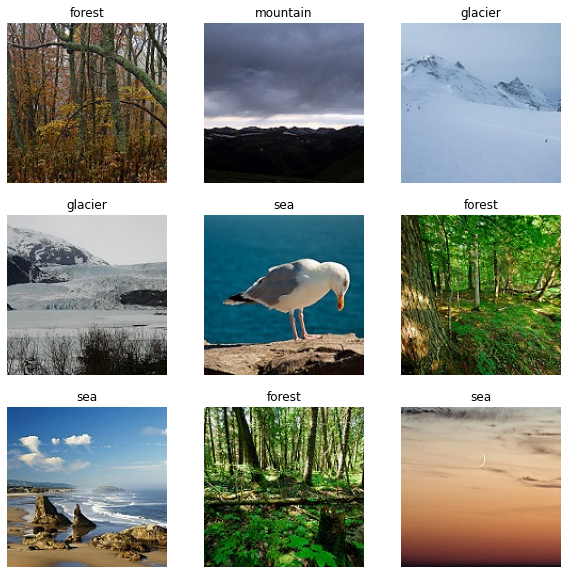

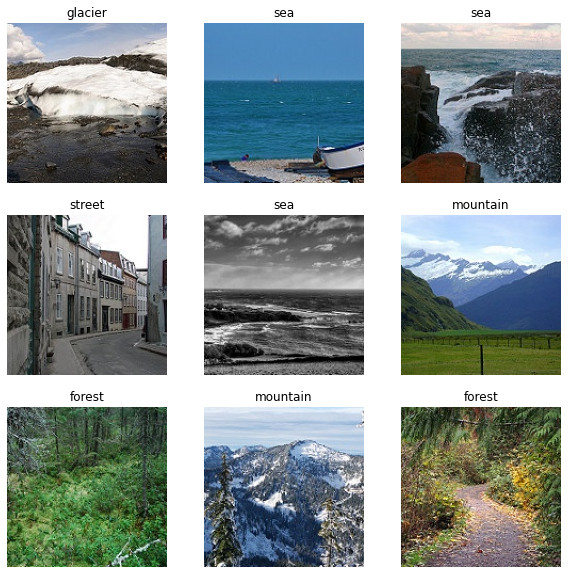

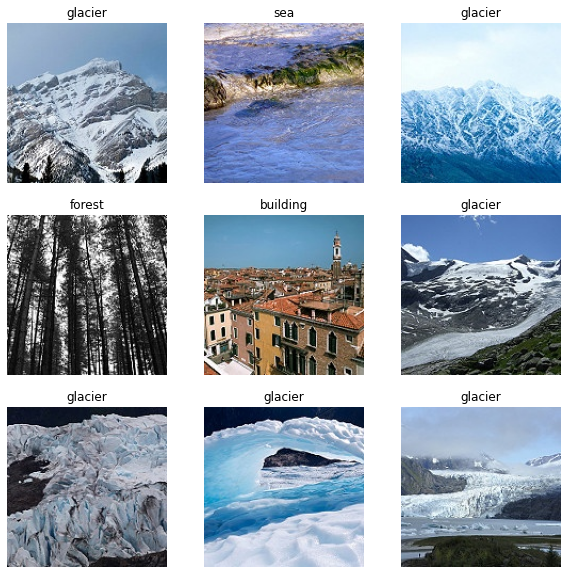

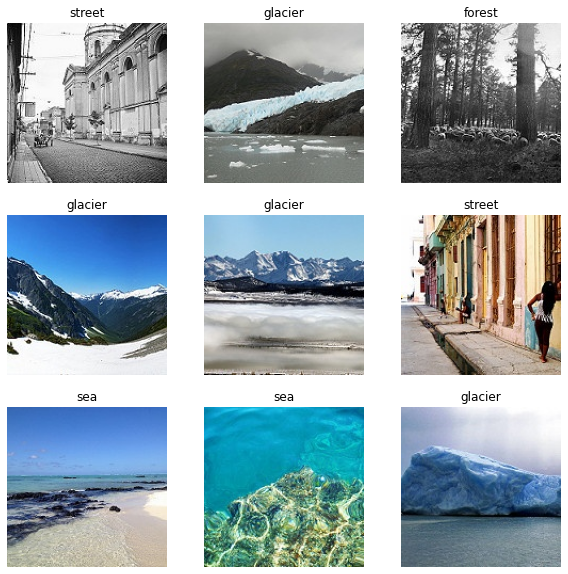

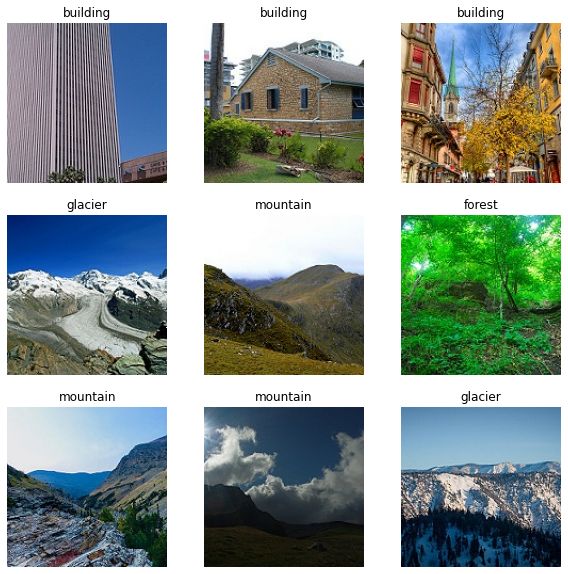

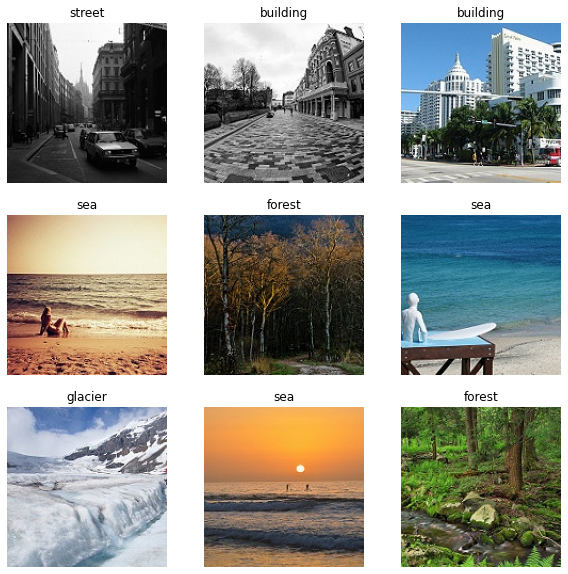

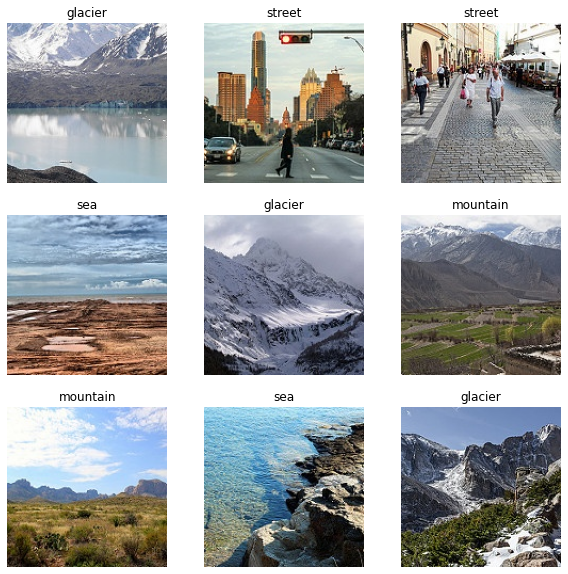

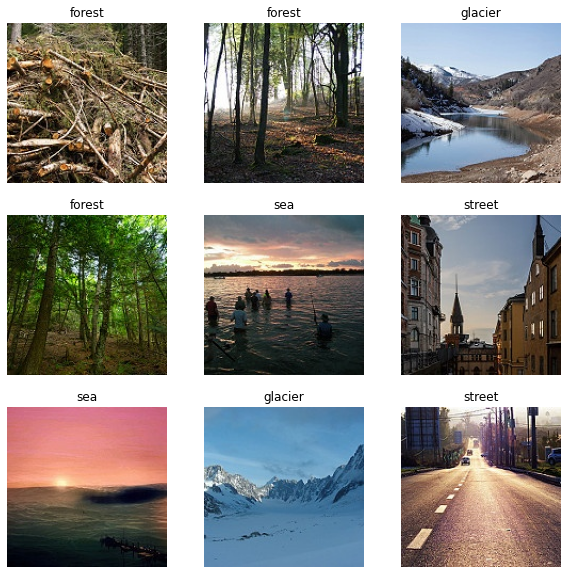

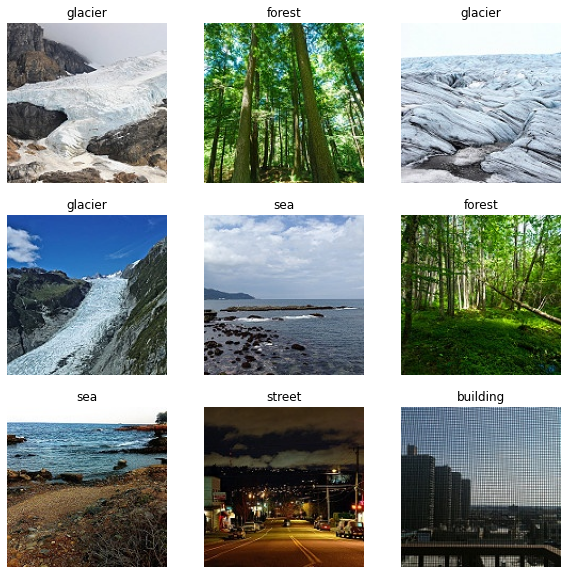

In [5]:
for i in range(0,90,9):
    make_predictions(i)